In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid
import pickle

In [418]:
df = pd.read_csv('../DataPaper/data/transcript_tags1_clean.csv')
df_tour = pd.read_csv('../DataPaper/data/scores_surveys.csv')
df_out = pd.read_csv('../DataPaper/data/finals_results.csv')

In [419]:
df.head()

,Unnamed: 0,text,label,rating,username,round
0,0,This is a response to why we think office to o...,introduction,NaN,gabbishilcusky,round5
1,1,So I think that opening Government substantiat...,rebuttal1,NaN,gabbishilcusky,round5
2,2,Okay. So in response to closing Governement.I ...,rebuttal2,NaN,gabbishilcusky,round5
3,3,Dennis's gave us an example of how in the hobb...,constructive1,NaN,gabbishilcusky,round5
4,4,ecause recognize the people who decide what ca...,constructive2,NaN,gabbishilcusky,round5


In [420]:
df_tour = df_tour[['round','username','score']].dropna()

In [421]:
df_tour['round'] = df_tour['round'].apply(lambda x: 'round'+str(int(x)))
df_tour.head()

,round,username,score
0,round2,AdiJK,78.0
1,round2,jmorgan,76.0
2,round2,jbotkin1,81.0
3,round2,Bfalkofs,77.0
4,round2,aabruzz1,79.0


In [422]:
df['id'] = df['username'] +'_'+df['round']

In [352]:
finid=['']
for r in ['round7', 'round9', 'round8','round10','round11']:
    finid = finid+list(df[df['round']==r]['id'].unique())
dfid = pd.DataFrame(finid)
dfid.to_csv('../DataPaper/data/finals_results.csv')

In [424]:
df_out['score'] = None

In [425]:
df_out.head()

,id,win,room,score
0,dfang8_round7,0,Trinity 305,None
1,andywang_round7,1,Stern 103,None
2,saniairfan_round7,1,Trinity 305,None
3,mcerman_round7,1,Stern 103,None
4,jhuang_round7,0,Trinity 305,None


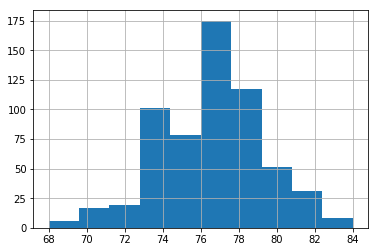

In [359]:
df_tour['score'].hist()
plt.show()

In [360]:
df_tour['score'].median()

76.0

In [365]:
df_tour[df_tour['score']>76].shape

(299, 3)

In [364]:
df_tour[df_tour['score']<=76].shape

(304, 3)

In [426]:
df_tour['win'] = np.where(df_tour['score']>76,1,0)

In [427]:
df_tour['id'] = df_tour['username'] +'_'+df_tour['round']

In [428]:
df_tour.head()

,round,username,score,win,id
0,round2,AdiJK,78.0,1,AdiJK_round2
1,round2,jmorgan,76.0,0,jmorgan_round2
2,round2,jbotkin1,81.0,1,jbotkin1_round2
3,round2,Bfalkofs,77.0,1,Bfalkofs_round2
4,round2,aabruzz1,79.0,1,aabruzz1_round2


In [409]:
df_tour.columns

Index(['round', 'username', 'score', 'id', 'win'], dtype='object')

In [411]:
df_out.columns

Index(['id', 'win', 'room'], dtype='object')

In [429]:
df_tour_full = pd.concat([df_tour[['id','win','score']],df_out[['id','win','score']]])

In [430]:
df_tour_full['id'] = df_tour_full['id'].str.lower()

In [431]:
df_trans = df.merge(df_tour_full, on = ['id'], how='left').drop('Unnamed: 0',axis=1)

In [432]:
df_trans.head()

,text,label,rating,username,round,id,win,score
0,This is a response to why we think office to o...,introduction,NaN,gabbishilcusky,round5,gabbishilcusky_round5,1.0,78
1,So I think that opening Government substantiat...,rebuttal1,NaN,gabbishilcusky,round5,gabbishilcusky_round5,1.0,78
2,Okay. So in response to closing Governement.I ...,rebuttal2,NaN,gabbishilcusky,round5,gabbishilcusky_round5,1.0,78
3,Dennis's gave us an example of how in the hobb...,constructive1,NaN,gabbishilcusky,round5,gabbishilcusky_round5,1.0,78
4,ecause recognize the people who decide what ca...,constructive2,NaN,gabbishilcusky,round5,gabbishilcusky_round5,1.0,78


In [35]:
score_class = {70:1,71:2,72:3,73:4,74:5,75:6,76:7,77:8,78:9,
               79:10,80:11,81:12,82:13,83:14,84:15}

In [377]:
df_trans = df_trans.dropna()

In [378]:
df_trans.shape

(4527, 7)

In [38]:
df_trans['score_class'] = df_trans['score'].apply(lambda x: score_class[x])

In [42]:
df_trans = pd.read_csv('../DataPaper/data/ann_transcript_score_class.csv')

In [437]:
df_trans_clean = df_trans[df_trans['label'].notna() & df_trans['text'].notna()]

In [438]:
df_cons = df_trans_clean[df_trans_clean['label'].str.contains('constructive')].reset_index()
df_cons = df_cons.drop(['index'],axis = 1)

In [439]:
df_cons.groupby(['win']).count()

,text,label,rating,username,round,id,score
win,,,,,,,
0.0,791,791,237,791,791,791,727
1.0,759,759,159,759,759,759,724


In [198]:
def trunc(df):
    for i in df.index:
        text = df['text'].iloc[i].split(' ')
        if len(text)>385:
            sent = text[-385:]
            sent = ' '.join(sent)
            df['text'].iloc[i] = sent
            print(i)
    
    return df

In [440]:
def make_unique(df,unid = 'id',label= 'win'):
    df_helper=df.groupby(unid)[label].first().reset_index()
    df_helper.groupby(label).count()
    train_ids=[]
    test_ids=[]
    for score in df_helper[label].unique():
        test = df_helper[df_helper[label]==score].sample(frac = 1/5)
        train = df_helper[df_helper[label]==score].drop(test.index)
        train_ids= train_ids+list(train[unid].unique())
        test_ids=test_ids+list(test[unid].unique())
    return train_ids,test_ids

In [443]:
def make_df(df,id_list):
    df_list=[]
    for ids in id_list:
        df_list.append(df[df['id']==ids])
    return pd.concat(df_list)

In [463]:
def make_dict(df):
    dict_list = []
    df = df.reset_index()
    for i in df.index:
        text = df['text'].iloc[i]
        text = text.replace("'\'",'')
        score = df['score'].iloc[i]
        un_id = df['id'].iloc[i]
        rating = df['rating'].iloc[i]
        dic = {'text':text,'score':score,'id':un_id,'rating':rating}
        dict_list.append(dic)
    return dict_list

In [441]:
df_cons_trunc = trunc(df_cons)

592
593
603
609
611
615
621
627
632
640
645
658
661
1197
1204
1205
1208
1214
1217
1219
1220
1222
1225
1227
1231
1236
1241
1242
1243
1253
1255
1258
1269
1270
1276
1282
1285
1290
1296
1297
1298
1299
1300
1304
1307
1309
1310
1311
1319
1322
1324
1325
1343
1345
1354
1357
1358
1369
1376
1381
1385
1386
1390
1393
1394
1395
1396
1398
1402
1403
1404
1407
1411
1413
1419
1420
1422
1424
1426
1429
1430
1431
1433
1434
1437
1439
1440
1442
1447
1450
1453
1456
1458
1462
1463
1468
1469
1472
1473
1474
1478
1484
1487
1488
1491
1496
1497
1500
1503
1504
1505
1506
1511
1512
1514
1515
1526
1528
1529
1532
1534
1535
1541
1543
1544
1546
1548
1549
1550
1553
1561
1566
1571
1573
1574
1576
1577
1580
1589
1605
1612
1613
1615
1618
1619
1620
1624
1625
1627
1631
1637
1640
1641
1645
1648
1654
1682
1692
1745
1788
1790
1817
1821


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [442]:
train_id, test_id = make_unique(df_cons_trunc)

In [444]:
df_train = make_df(df_cons_trunc,train_id)
df_test = make_df(df_cons_trunc,test_id)

In [451]:
df_train.shape
df_test.shape

(311, 8)

In [452]:
traindev_id, val_id = make_unique(df_train)

In [453]:
df_traindev = make_df(df_train,traindev_id)
df_val = make_df(df_train,val_id)

In [454]:
print(df_traindev.shape)
print(df_val.shape)

(1019, 8)
(220, 8)


In [460]:
def data_set_dict(df_train,df_test,df_dev):
    datadict = {}
    datadict['test'] = make_dict(df_test)
    datadict['train'] = make_dict(df_train)
    datadict['val'] = make_dict(df_val)
    return datadict

In [466]:
df_test.to_csv('data/ann_transcript_score_class_test.csv')
df_traindev.to_csv('data/ann_transcript_score_class_train.csv')
df_val.to_csv('data/ann_transcript_score_class_val.csv')

In [464]:
dataset = {'train':make_dict(df_traindev),'val':make_dict(df_val),'test':make_dict(df_test)}

In [465]:
with open('data/debate_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

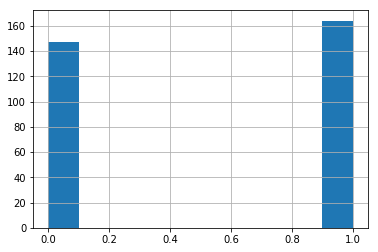

In [458]:
df_test['win'].hist()

In [58]:
dftest_list =[]
dftrain_list = []
for score in df_cons['score_class'].unique():
    test = df_cons[df_cons['score_class']==score].sample(frac = 1/5)
    train = df_cons[df_cons['score_class']==score].drop(test.index)
    dftest_list.append(test)
    dftrain_list.append(train)

In [59]:
dftest_cons = pd.concat(dftest_list)
dftrain_cons = pd.concat(dftrain_list)

In [62]:
dftest_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2])

In [65]:
dftrain_cons['score_class'].unique()

array([ 9,  7, 10, 11,  4,  8, 13,  6, 15,  5,  3, 12,  2,  1, 14])

In [66]:
dftest_cons.shape

(158, 6)

In [79]:
dftest_cons =dftest_cons.reset_index()

In [68]:
dftrain_cons.shape

(643, 6)

In [80]:
for i in dftest_cons.index:
    text = dftest_cons['text'].iloc[i].split(' ')
    if len(text)>512:
        print(i)

70
86


In [82]:
dftest_cons = dftest_cons.drop([70,86])

In [104]:
dftest_cons = pd.read_csv('data/ann_transcript_score_class_test.csv')
dftrain_cons = pd.read_csv('data/ann_transcript_score_class_train.csv')

In [86]:
dftest_cons['score_class']=dftest_cons['score_class']-1
dftrain_cons['score_class']=dftrain_cons['score_class']-1

In [87]:
dftest_cons.to_csv('data/ann_transcript_score_class_test.csv')
dftrain_cons.to_csv('data/ann_transcript_score_class_train.csv')

In [105]:
dftrain_cons['score_class'].unique()

array([ 8,  6,  9, 10,  3,  7, 12,  5, 14,  4,  2, 11,  1,  0, 13])

In [98]:
def squash(x):
    if x>=0 and x<=2:
        return 0
    elif x==3 or x==4:
        return 1
    elif x==5 or x == 6:
        return 2
    elif x == 7 or x==8:
        return 3
    elif x == 9 or x ==10:
        return 4
    elif x ==  11 or x ==12:
        return 5
    else:
        return 6

In [106]:
dftrain_red = dftrain_cons
dftest_red = dftest_cons

In [107]:
dftrain_red['score_class'] = dftrain_red['score_class'].apply(lambda x: squash(x))
dftest_red['score_class'] = dftest_red['score_class'].apply(lambda x: squash(x))

In [111]:
dftest_red['score_class'].unique()

array([3, 2, 4, 1, 5, 6, 0])

In [140]:
df = pd.concat([dftrain_red,dftest_red])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


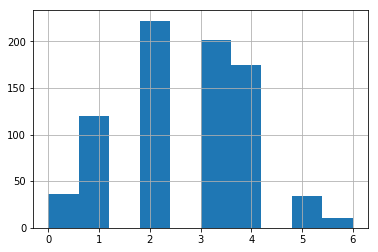

In [304]:
df['score_class'].hist()
plt.show()

In [306]:
print('< 3 ',df[df['score_class']<3].shape )
print('> 3 ',df[df['score_class']>=3].shape )

< 3  (378, 10)
> 3  (421, 10)


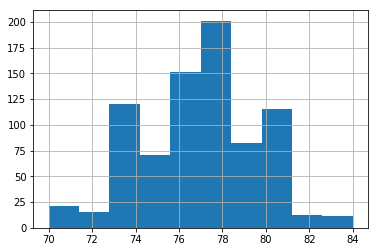

In [307]:
df['score'].hist()
plt.show()

In [142]:
df['id'] = df['username'] +'_'+df['round']

In [147]:
df_helper=df.groupby('id')['score_class'].first().reset_index()
df_helper.groupby('score_class').count()

,id
score_class,
0,10
1,33
2,49
3,43
4,39
5,5
6,3


In [156]:
train_ids=[]
test_ids=[]
for score in df_helper['score_class'].unique():
    test = df_helper[df_helper['score_class']==score].sample(frac = 1/5)
    train = df_helper[df_helper['score_class']==score].drop(test.index)
    train_ids= train_ids+list(train['id'].unique())
    test_ids=test_ids+list(test['id'].unique())

In [159]:
len(train_ids)+len(test_ids)

182

In [164]:
dftrain_red = make_df(df,train_ids)
dftest_red = make_df(df,test_ids)

In [168]:
dftest_red['score_class'].unique()

array([1, 4, 5, 2, 0, 3, 6])

In [180]:
dftest_red=dftest_red.reset_index()
dftrain_red=dftrain_red.reset_index()

In [194]:
dftest_red = pd.read_csv('data/ann_transcript_score_class_test.csv')
dftrain_red = pd.read_csv('data/ann_transcript_score_class_train.csv')

In [199]:
dftest_red = trunc(dftest_red)
dftrain_red = trunc(dftrain_red)

105
109
112
3
5
26
60
75
89
99
100
200
209
228
231
264
357
372
382
441
464
466
475
518
569
576
578
595
596


In [308]:
# train
print('< 3 ',dftrain_red[dftrain_red['score_class']<3].shape )
print('> 3 ',dftrain_red[dftrain_red['score_class']>=3].shape )

< 3  (309, 9)
> 3  (310, 9)


In [309]:
# test
print('< 3 ',dftest_red[dftest_red['score_class']<3].shape )
print('> 3 ',dftest_red[dftest_red['score_class']>=3].shape )

< 3  (69, 9)
> 3  (111, 9)


In [200]:
dftest_red.to_csv('data/ann_transcript_score_class_test.csv')
dftrain_red.to_csv('data/ann_transcript_score_class_train.csv')

In [311]:
test_list = make_dict(dftest_red)
train_list = make_dict(dftrain_red)

In [265]:
train_list

[{'text': "You're more likely to actually put value in education because your parents do. But also feeling loved is critical for social formation, to prevent social isolation. Think of all the reasons why many, many kids turn out to be school bullies and not care about school to begin with, right? Many of that has to do with being ostracized and not having a good situational, situation at home.",
  'score': 1,
  'id': '123dyly_round2'},
 {'text': "First, as a unit motivation, right? This is incredibly important because of the fact that many children, especially at those age, don't really give a damn about school. They just want to have fun, they want to eat ice cream like this that, they don't really care about the long haul and making sure they get a good career at that point. So the motivation to work often has to do with the bond you have with your parents, like making them feel happy, right? When the parent says... Speaks from a place of authority, when they've actually spent a lot

In [315]:
for i in train_list:
    if "\'" in i['text']:
        x = i
        print(x)

{'text': "You're more likely to actually put value in education because your parents do. But also feeling loved is critical for social formation, to prevent social isolation. Think of all the reasons why many, many kids turn out to be school bullies and not care about school to begin with, right? Many of that has to do with being ostracized and not having a good situational, situation at home.", 'score': 1, 'id': '123dyly_round2'}
{'text': "First, as a unit motivation, right? This is incredibly important because of the fact that many children, especially at those age, don't really give a damn about school. They just want to have fun, they want to eat ice cream like this that, they don't really care about the long haul and making sure they get a good career at that point. So the motivation to work often has to do with the bond you have with your parents, like making them feel happy, right? When the parent says... Speaks from a place of authority, when they've actually spent a lot of tim

In [313]:
s = x['text'].replace("'\'",'')

In [318]:
"'\'" in x['text']

False

In [448]:
len(train_list)

532

In [187]:
with open('data/debate_cons_test.pkl', 'wb') as f:
    pickle.dump(test_list, f)

In [188]:
with open('data/debate_cons_train.pkl', 'wb') as f:
    pickle.dump(train_list, f)

In [201]:
dftest_red.groupby('score_class').count()

,Unnamed: 0,index,label,round,score,text,username,id
score_class,,,,,,,,
0,8,8,8,8,8,8,8,8
1,21,21,21,21,21,21,21,21
2,40,40,40,40,40,40,40,40
3,59,59,59,59,59,59,59,59
4,38,38,38,38,38,38,38,38
5,10,10,10,10,10,10,10,10
6,4,4,4,4,4,4,4,4


### Making Validation Set

In [218]:
df_val_helper=dftrain_red.groupby('id')['score_class'].first().reset_index()

In [250]:
dev_train_ids=[]
val_ids=[]
for score in df_val_helper['score_class'].unique():
    val = df_val_helper[df_val_helper['score_class']==score].sample(frac = 0.15)
    train = df_val_helper[df_val_helper['score_class']==score].drop(val.index)
    dev_train_ids= dev_train_ids+list(train['id'].unique())
    val_ids=val_ids+list(val['id'].unique())

In [251]:
dftrain_dev = make_df(dftrain_red,dev_train_ids)
dfval = make_df(dftrain_red,val_ids)

In [252]:
dftrain_dev.shape

(532, 9)

In [253]:
dfval.shape

(87, 9)

In [254]:
dftrain_red.shape

(619, 9)

In [255]:
dfval['score_class'].unique()

array([1, 4, 5, 0, 3, 2])

In [256]:
dfval.to_csv('data/ann_transcript_score_class_val.csv')
dftrain_dev.to_csv('data/ann_transcript_score_class_train.csv')

In [317]:
train_list = make_dict(dftrain_dev.reset_index())
val_list = make_dict(dfval.reset_index())

In [326]:
for (ex_index, example) in enumerate(val_list):
    (text,label,sid) = example

In [319]:
with open('data/debate_cons_test.pkl', 'wb') as f:
    pickle.dump(test_list, f)

In [320]:
with open('data/debate_cons_train.pkl', 'wb') as f:
    pickle.dump(train_list, f)

In [321]:
with open('data/debate_cons_val.pkl', 'wb') as f:
    pickle.dump(val_list, f)